In [8]:
!OMP_NUM_THREADS=1 meson test -C build/ hamiltonian --verbose > notes/capture/ordinary_run.txt

In [10]:
import re
import pandas as pd

# Define the file path
file_path = "notes/capture/ordinary_run.txt"

# Read the file content
with open(file_path, "r") as file:
    content = file.read()

# Define a regex pattern to extract the test case and its details
pattern = r"Starting hamiltonian-(?P<testcase>[\w\-]+) \.\.\. \(\d+/\d+\)\n" \
          r" nat\s+(?P<nat>\d+)\n" \
          r" nprim\s+(?P<nprim>\d+)\n" \
          r" maxl\s+(?P<maxl>\d+)\n" \
          r" max_nnl\s+(?P<max_nnl>\d+)\n" \
          r" mean_nnl\s+(?P<mean_nnl>\d+)\n" \
          r" max_nsh\s+(?P<max_nsh>\d+)\n" \
          r"cpu_time\s+(?P<cpu_time>[\d\.]+)\n" \
          r"gpu_gb_in\s+(?P<gpu_gb_in>[\d\.]+)\n" \
          r"gpu_gb_out\s+(?P<gpu_gb_out>[\d\.]+)\n" \
          r"gpu_gb_total\s+(?P<gpu_gb_total>[\d\.]+)\n" \
          r"gpu_between_atoms\s+(?P<gpu_between_atoms>[\d\.]+) ms\n" \
          r"gpu_in_atoms\s+(?P<gpu_in_atoms>[\d\.]+)\n" \
          r"gpu_time\s+(?P<gpu_time>[\d\.]+)\n" \
          r"\s+gpu_walltime\s+(?P<gpu_walltime>[\d\.]+)"

# Use re.finditer to extract all matches
matches = re.finditer(pattern, content)

# Create a list of dictionaries to store the extracted data
data = []
for match in matches:
    data.append(match.groupdict())

# Convert the list of dictionaries into a pandas DataFrame
df = pd.DataFrame(data)

# Convert numeric columns to appropriate data types
numeric_columns = ["nat", "nprim", "maxl", "max_nnl", "mean_nnl", "max_nsh",
                   "cpu_time", "gpu_between_atoms", "gpu_in_atoms", "gpu_time", "gpu_walltime"]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

# Display the DataFrame
df = df.sort_values('nat')
df

,testcase,nat,nprim,maxl,max_nnl,mean_nnl,max_nsh,cpu_time,gpu_gb_in,gpu_gb_out,gpu_gb_total,gpu_between_atoms,gpu_in_atoms,gpu_time,gpu_walltime
0,1,2,6,0,1,0,1,0.068421,0.000001,0.000000,0.000002,7.884960,0.626688,8.511648,69.921984
1,3,2,6,2,1,0,3,1.041534,0.000030,0.000029,0.000059,8.028160,4.548672,12.576832,13.559853
2,4,5,6,2,4,2,3,0.508360,0.000018,0.000015,0.000033,1.415168,4.678336,6.093504,7.275594
3,Glutamine,29,6,1,28,14,2,5.228439,0.000453,0.000444,0.000896,4.477088,1.351584,5.828672,7.845326
4,DNA-strand,387,6,2,165,69,3,497.167956,0.232068,0.231803,0.463871,298.374908,8.335648,306.710571,410.603277
6,101d-netropsin-and-dna,556,6,2,484,203,3,847.782082,0.479133,0.478153,0.957286,786.060303,10.094592,796.154907,1008.093900
5,lysozyme,1102,6,2,312,99,3,1209.174580,1.749900,1.748891,3.498792,976.949036,16.030752,992.979797,1756.477916
7,103l-t4-lysozyme,1404,6,2,314,99,3,1586.283415,2.816439,2.815150,5.631588,1200.689209,19.251488,1219.940674,2435.744342


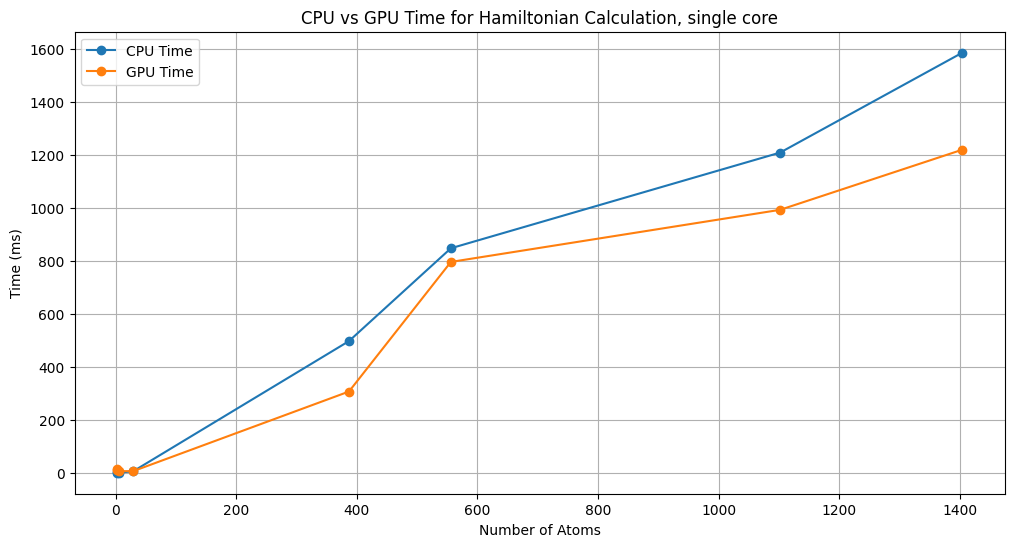

In [11]:
import matplotlib.pyplot as plt

# Line plot for time vs number of atoms, and compare CPU and GPU times
plt.figure(figsize=(12, 6))
plt.plot(df['nat'], df['cpu_time'], label='CPU Time', marker='o')
plt.plot(df['nat'], df['gpu_time'], label='GPU Time', marker='o')
plt.xlabel('Number of Atoms')
plt.ylabel('Time (ms)')
plt.title('CPU vs GPU Time for Hamiltonian Calculation, single core')
plt.legend()
plt.grid()
plt.savefig('notes/figures/ordinary_run_1_cpu_vs_gpu_time_ms.png')
plt.show()

In [12]:
# Enable all CPU cores
!OMP_NUM_THEADS=32 meson test -C build/ hamiltonian --verbose > notes/capture/multicore_run.txt

In [13]:
# Read the file content
with open('notes/capture/multicore_run.txt', "r") as file:
    content = file.read()

matches = re.finditer(pattern, content)

# Create a list of dictionaries to store the extracted data
data = []
for match in matches:
    data.append(match.groupdict())

# Convert the list of dictionaries into a pandas DataFrame
df = pd.DataFrame(data)

# Convert numeric columns to appropriate data types
numeric_columns = ["nat", "nprim", "maxl", "max_nnl", "mean_nnl", "max_nsh",
                   "cpu_time", "gpu_between_atoms", "gpu_in_atoms", "gpu_time", "gpu_walltime"]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

# Display the DataFrame
df = df.sort_values('nat')
df

,testcase,nat,nprim,maxl,max_nnl,mean_nnl,max_nsh,cpu_time,gpu_gb_in,gpu_gb_out,gpu_gb_total,gpu_between_atoms,gpu_in_atoms,gpu_time,gpu_walltime
0,1,2,6,0,1,0,1,11.758540,0.000001,0.000000,0.000002,7.322560,0.414720,7.737280,1515.267475
1,Glutamine,29,6,1,28,14,2,5.794054,0.000453,0.000444,0.000896,4.376864,1.229824,5.606688,6.779938
2,DNA-strand,387,6,2,165,69,3,59.673336,0.232067,0.231803,0.463871,312.598389,8.047776,320.646179,428.044582
4,101d-netropsin-and-dna,556,6,2,484,203,3,112.650564,0.479133,0.478153,0.957286,787.489807,10.056704,797.546509,1029.464627
3,lysozyme,1102,6,2,311,99,3,230.760722,1.749900,1.748891,3.498791,952.197144,16.143553,968.340698,1738.527335
5,103l-t4-lysozyme,1404,6,2,316,99,3,334.129203,2.816439,2.815150,5.631588,1200.783203,19.406176,1220.189331,2481.406740


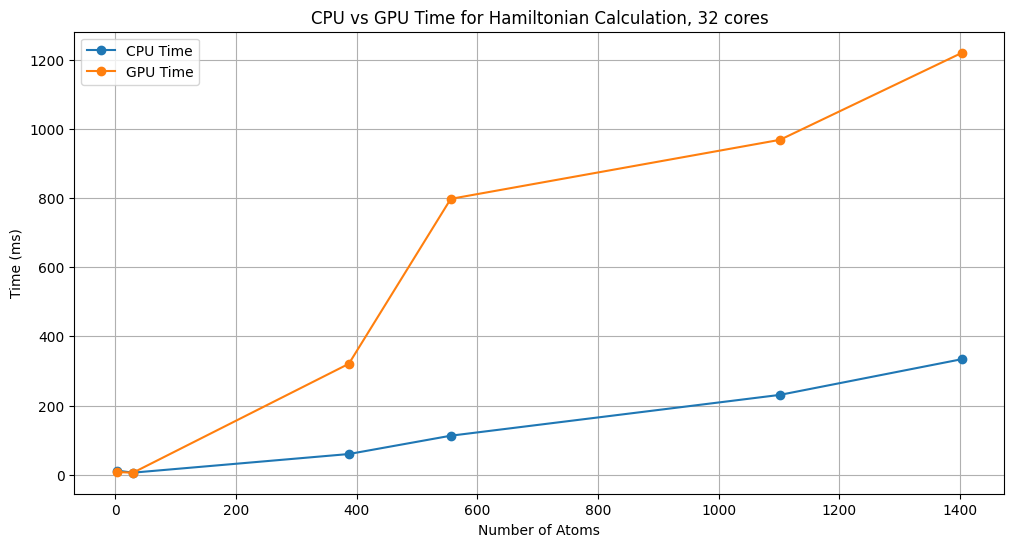

In [15]:
import matplotlib.pyplot as plt

# Line plot for time vs number of atoms, and compare CPU and GPU times
plt.figure(figsize=(12, 6))
plt.plot(df['nat'], df['cpu_time'], label='CPU Time', marker='o')
plt.plot(df['nat'], df['gpu_time'], label='GPU Time', marker='o')
plt.xlabel('Number of Atoms')
plt.ylabel('Time (ms)')
plt.title('CPU vs GPU Time for Hamiltonian Calculation, 32 cores')
plt.legend()
plt.grid()
plt.savefig('notes/figures/multicore_run_32_cpu_vs_gpu_time_ms.png')
plt.show()